# Estadistica inferencial.

In [1]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
# traigo mis datos....tal vez los use!!

df = pd.read_csv("bank-additional-clean-nonulls.csv")
df.head(2)

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,hijos_totales,age,euribor3m,pdays
0,161770.0,1.0,0.0,2012-04-04,29.0,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,1.0 hijos,40.005436,4.857000,4.4
1,85477.0,1.0,1.0,2012-12-30,7.0,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,No,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,2.0 hijos,57.000000,3.603174,4.8


La informacion proviene de:

1- Poblacion: es el conjunto de datos de todos los elementos que estamos interesados en estudiar.

2- Muestra: subconjunto de la poblacion que se selecciona para el estudio. LA MUESTRA DEBE SER REPRESENTATIVA!!!!!!!


# Distribucion de la muestra:

Como se reparten esos datos!

A- Distribucion normal o gaussiana: es la mas comun y se caracteriza por tener una forma de campana (la campana de gauss).
B- Distribucion uniforme: los datos se ven de manera CASI plano.
C- Distribucion exponencial: describe el tiempo entre eventos sucesivos. (representa el tiempo entre un evento y otro INDEPENDIENTE!)
D- Distribucion Poisson: Probabilidad de que se produzca un numero de eventos. (bucamos cantidad de eventos en un intervalo de tiempo)

# TIPOS DE DISTRIBUCIONES.

## Distribuciones.

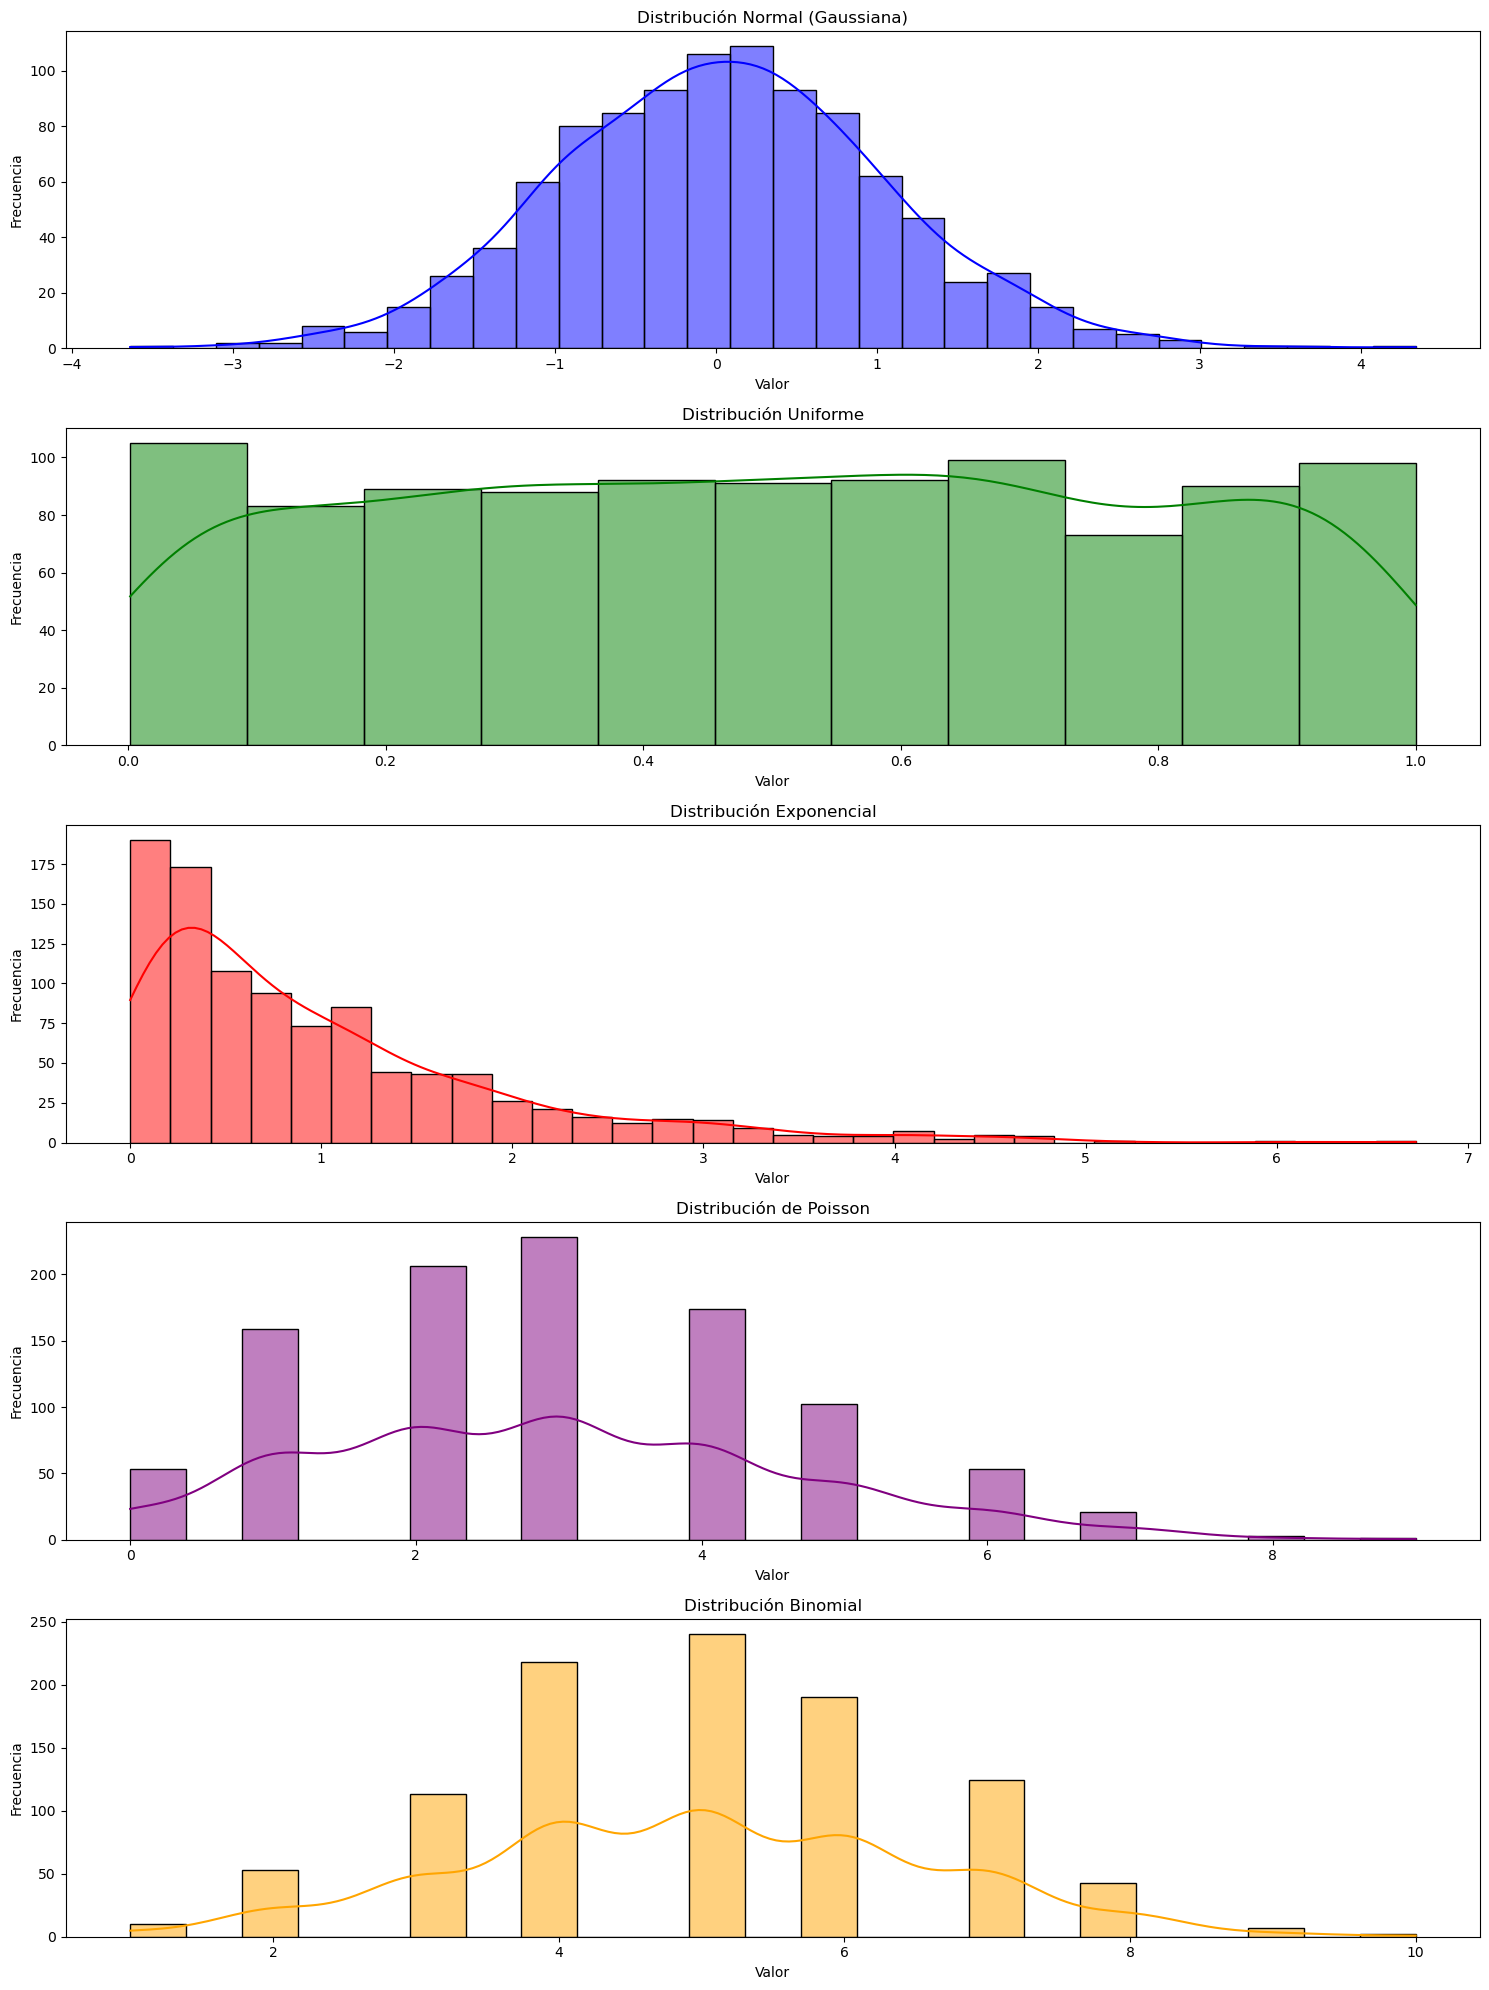

In [10]:
# A: Distribución Normal (Gaussiana)
data_normal = np.random.normal(loc=0, scale=1, size=1000)

# B: Distribución Uniforme
data_uniforme = np.random.uniform(low=0, high=1, size=1000)

# C: Distribución Exponencial
data_exponencial = np.random.exponential(scale=1, size=1000)

# D: Distribución de Poisson
data_poisson = np.random.poisson(lam=3, size=1000)

# E: Distribución Binomial
data_binomial = np.random.binomial(n=10, p=0.5, size=1000)

# Configuración de los gráficos
plt.figure(figsize=(15, 20))

# Graficar Distribución Normal
plt.subplot(5, 1, 1)
sns.histplot(data_normal, kde=True, color='blue')
plt.title('Distribución Normal (Gaussiana)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Graficar Distribución Uniforme
plt.subplot(5, 1, 2)
sns.histplot(data_uniforme, kde=True, color='green')
plt.title('Distribución Uniforme')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Graficar Distribución Exponencial
plt.subplot(5, 1, 3)
sns.histplot(data_exponencial, kde=True, color='red')
plt.title('Distribución Exponencial')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Graficar Distribución de Poisson
plt.subplot(5, 1, 4)
sns.histplot(data_poisson, kde=True, color='purple')
plt.title('Distribución de Poisson')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Graficar Distribución Binomial
plt.subplot(5, 1, 5)
sns.histplot(data_binomial, kde=True, color='orange')
plt.title('Distribución Binomial')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()


## Datos sesgados (derecha e izquierda)

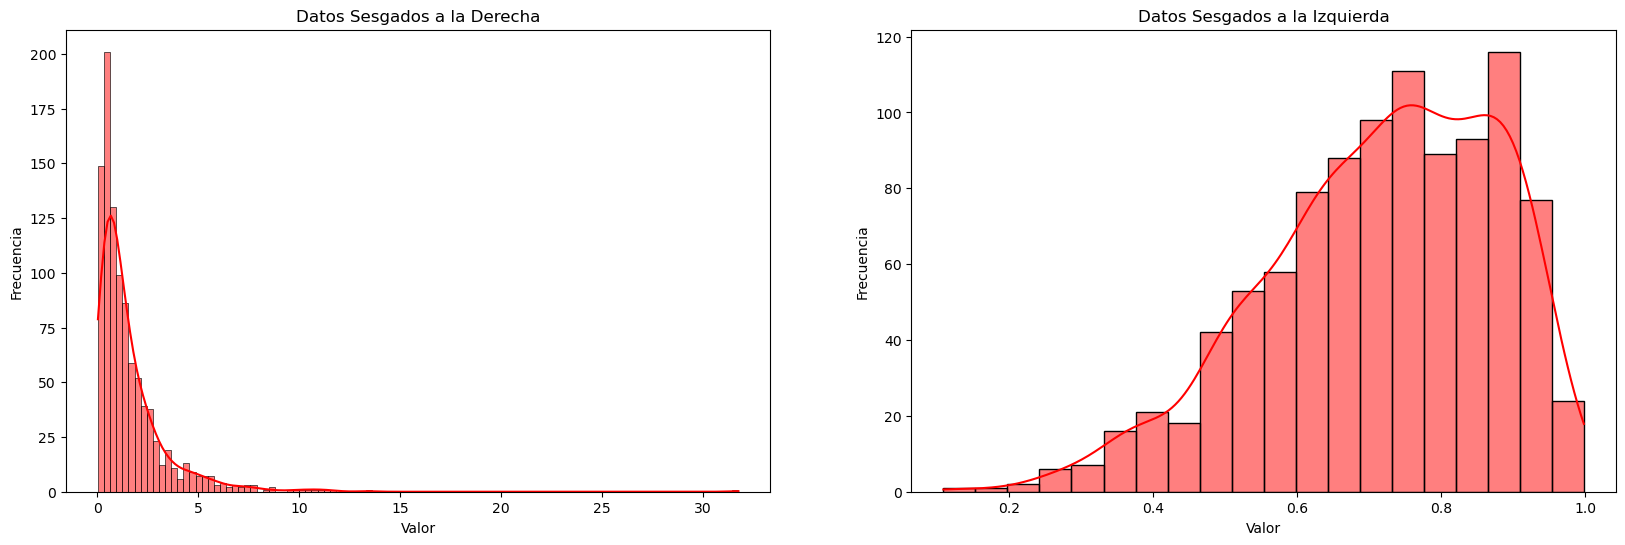

In [15]:
# Generar datos sesgados a la derecha (distribución log-normal)
data_sesgo_derecha = np.random.lognormal(mean=0, sigma=1, size=1000)

# Generar datos sesgados a la izquierda (distribución beta con a > b)
data_sesgo_izquierda = np.random.beta(a=5, b=2, size=1000)

# Crear una figura con dos subgráficos
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Graficar datos sesgados a la derecha
sns.histplot(data_sesgo_derecha, kde=True, color='red', ax=axs[0])
axs[0].set_title('Datos Sesgados a la Derecha')
axs[0].set_xlabel('Valor')
axs[0].set_ylabel('Frecuencia')

# Graficar datos sesgados a la izquierda
sns.histplot(data_sesgo_izquierda, kde=True, color='red', ax=axs[1])
axs[1].set_title('Datos Sesgados a la Izquierda')
axs[1].set_xlabel('Valor')
axs[1].set_ylabel('Frecuencia');



# Ubicacion de la media y mediana con datos sesgados.

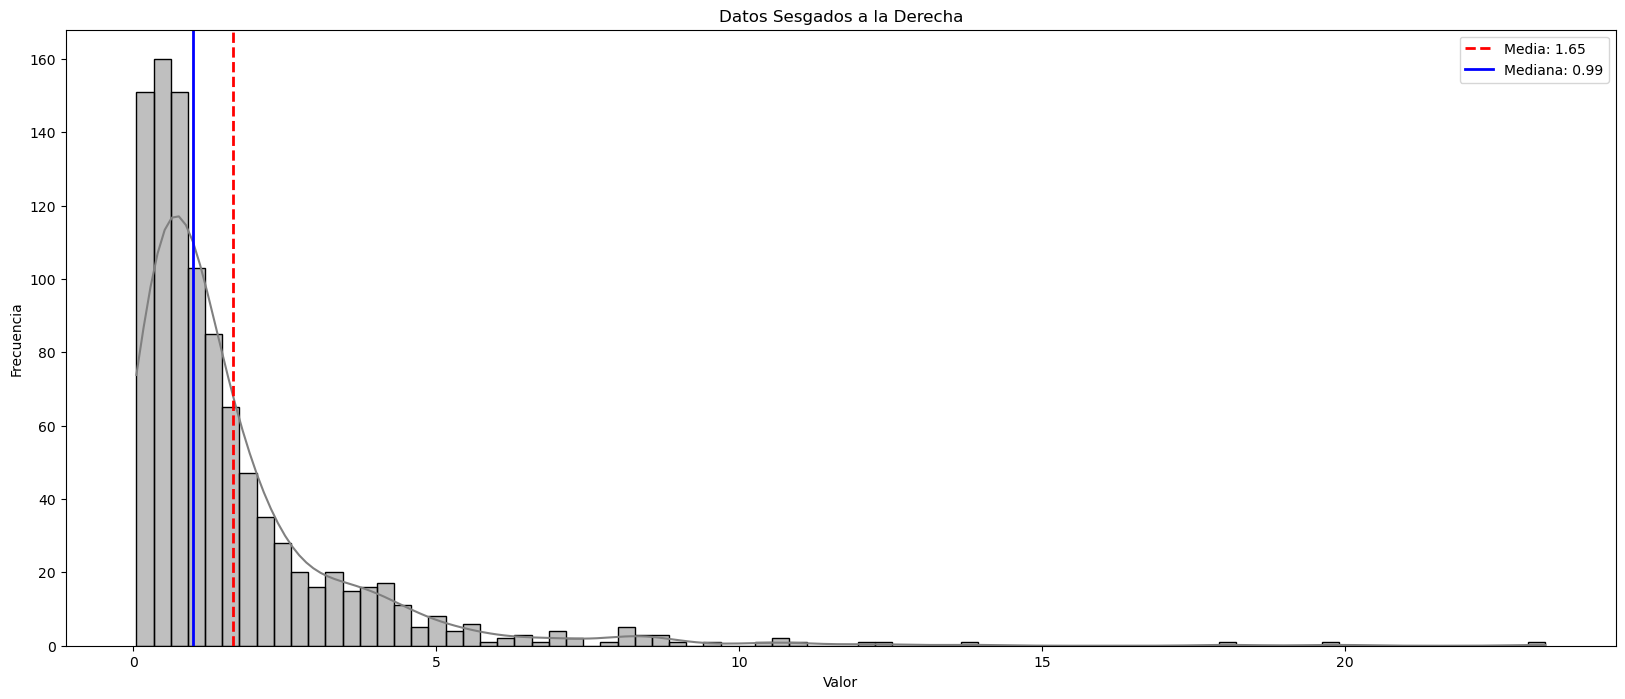

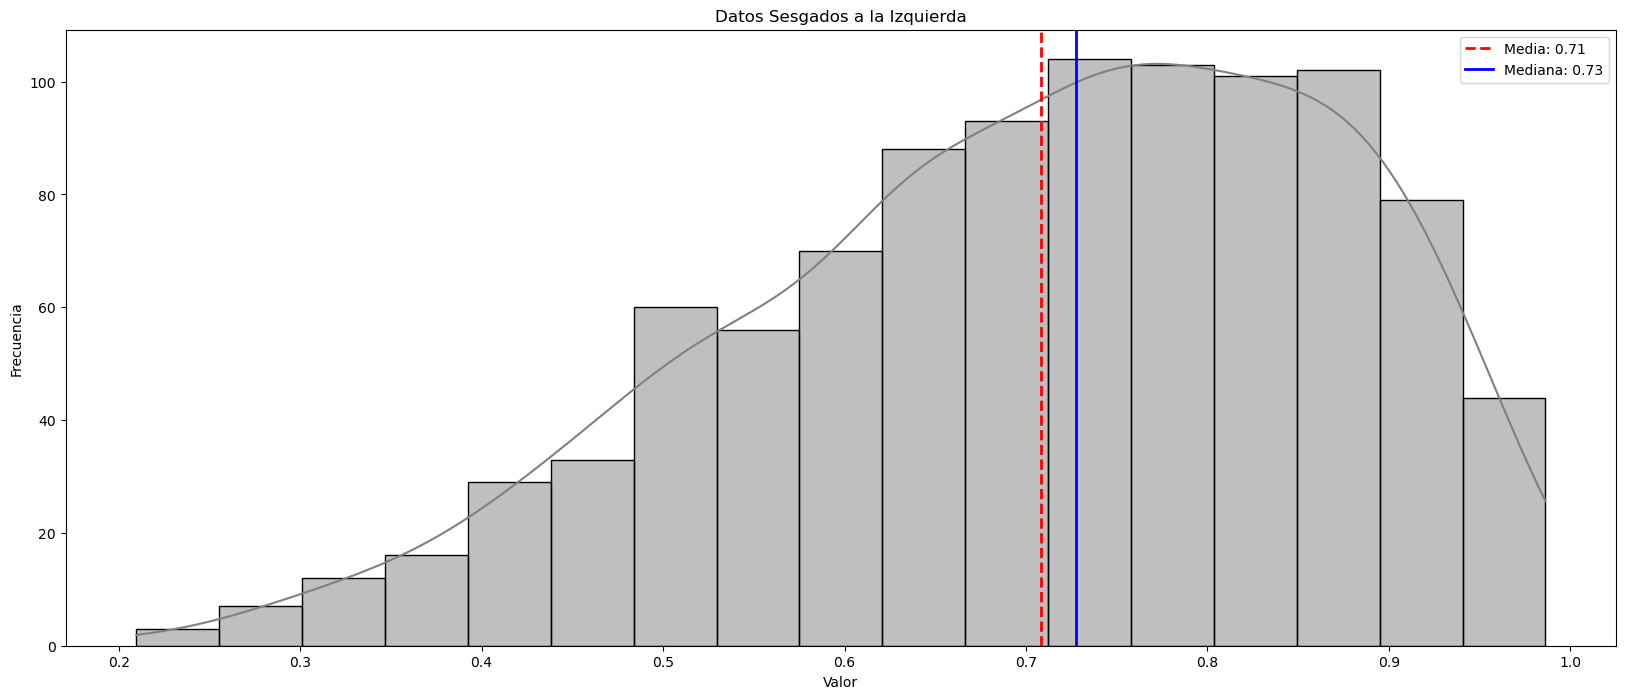

In [13]:
# Generar datos sesgados a la derecha (distribución log-normal)
data_sesgo_derecha = np.random.lognormal(mean=0, sigma=1, size=1000)

# Generar datos sesgados a la izquierda (distribución beta con a > b)
data_sesgo_izquierda = np.random.beta(a=5, b=2, size=1000)

# Función para agregar líneas de media y mediana
def agregar_media_mediana(ax, data):
    media = np.mean(data)
    mediana = np.median(data)
    ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
    ax.axvline(mediana, color='blue', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')
    ax.legend()

# Graficar datos sesgados a la derecha
plt.figure(figsize=(20, 8))
ax1 = sns.histplot(data_sesgo_derecha, kde=True, color='grey')
agregar_media_mediana(ax1, data_sesgo_derecha)
plt.title('Datos Sesgados a la Derecha')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

# Graficar datos sesgados a la izquierda
plt.figure(figsize=(20, 8))
ax2 = sns.histplot(data_sesgo_izquierda, kde=True, color='grey')
agregar_media_mediana(ax2, data_sesgo_izquierda)
plt.title('Datos Sesgados a la Izquierda')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


In [3]:
df.head(2)

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,hijos_totales,age,euribor3m,pdays
0,161770.0,1.0,0.0,2012-04-04,29.0,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,1.0 hijos,40.005436,4.857000,4.4
1,85477.0,1.0,1.0,2012-12-30,7.0,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,No,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,2.0 hijos,57.000000,3.603174,4.8


In [4]:
media = df["pdays"].mean()
mediana = df["pdays"].median()

print(f"la media es {media}")
print(f"la mediana es {mediana}")

la media es 6.12352593579797
la mediana es 5.8


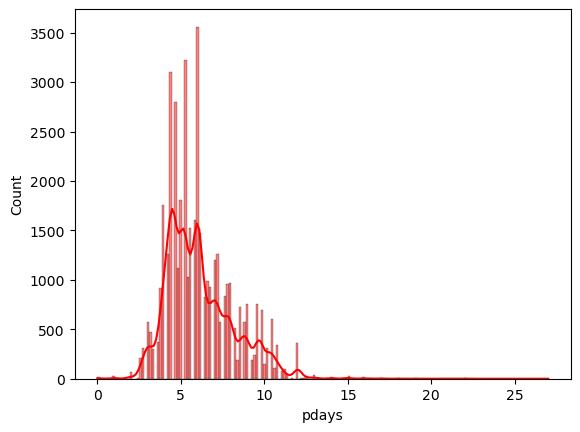

In [5]:
sns.histplot(df["pdays"],kde=True,color="red");

# Importancia de los valores de las desviaciones.

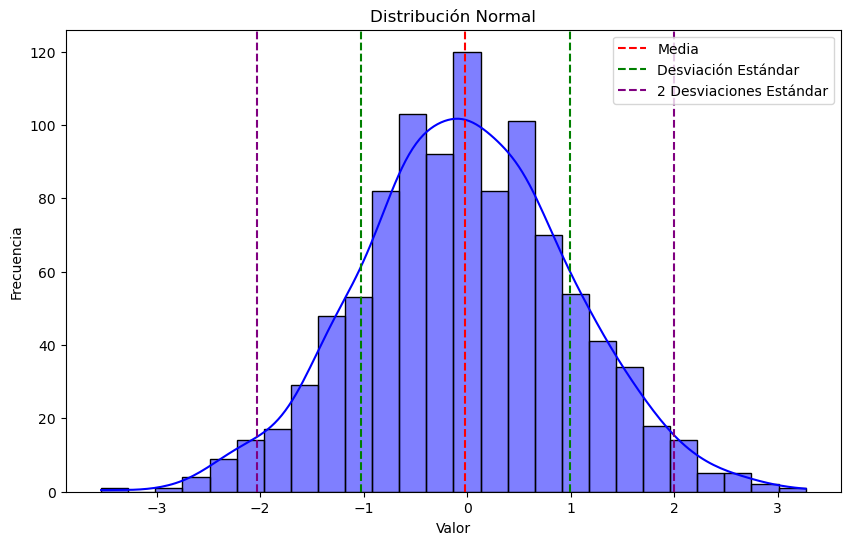

In [16]:
# Generar datos de una distribución normal
datos_normal = np.random.normal(loc=0, scale=1, size=1000)

# Calcular media y desviación estándar
media = np.mean(datos_normal)
desviacion_estandar = np.std(datos_normal)

# Graficar la distribución normal
plt.figure(figsize=(10, 6))
sns.histplot(datos_normal, kde=True, color='blue')
plt.axvline(media, color='red', linestyle='--', label='Media')
plt.axvline(media + desviacion_estandar, color='green', linestyle='--', label='Desviación Estándar')
plt.axvline(media - desviacion_estandar, color='green', linestyle='--')
plt.axvline(media + 2 * desviacion_estandar, color='purple', linestyle='--', label='2 Desviaciones Estándar')
plt.axvline(media - 2 * desviacion_estandar, color='purple', linestyle='--')
plt.title('Distribución Normal')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


# distribucion gaussiana.

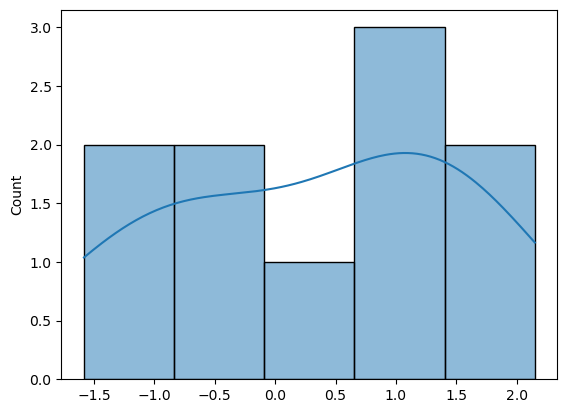

In [15]:
# craacteristicas
# forma de campana
# la desviacion estandard controla su extension
# simetrico


datos_normal = np.random.normal(0,1,10)

sns.histplot(datos_normal,kde=True);

In [ ]:
# hipotesis nula y alternativa:

#H0: asumimos la distribucion como normal (si mi p_value > 0.05 NO se rechaza la hipotesi nula)

#H1: asumimos que la distribucion NO es normal (si mi p_value < 0.05 se rechaza la hipotesi nula)

In [ ]:
# test de shapiro o test de kolmogorov

# Shapiro para muestras mas pequenas (500 o menos)
# Kolmogorov para muestras mas grandes (mas de 500 muestras)

In [16]:
# test Kolmogorov

p_value_k = kstest(datos_normal,"norm").pvalue

p_value_k 

0.13604913763689408

In [17]:
# test shapiro

p_value_s = shapiro(datos_normal).pvalue

p_value_s

0.6517542004585266

# distribucion uniforme.

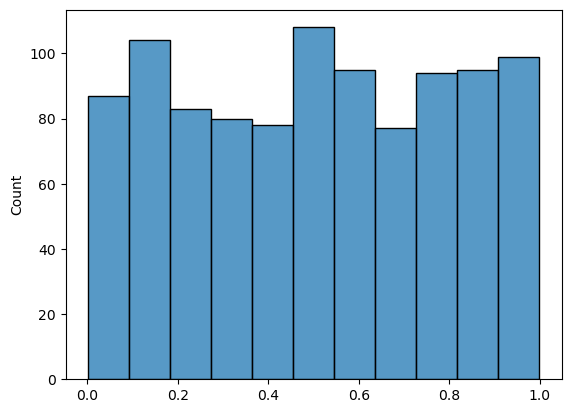

In [27]:
# todos los valores tiene la misma probabilidad de ocurrir
# la grafica CASI plana.


datos_uni = np.random.uniform(0,1,1000)

sns.histplot(datos_uni);

In [26]:
# que tipo de test podemos hacer para saber si son datos uniformes???

p_value_k = kstest(datos_uni,"uniform").pvalue

p_value_k 

0.43527266855931634

# distribucion exponencial!

In [28]:
# modela el tiempo entre eventos aleatorios e INDEPENDIENTES!!!!! MIDE EL TIEMPO ENTRE EVENTOS (OCURRENCIAS)

# que el espeacio de tiempo es medido en una hora

lambda_param = 1

# generando numeros aleatorios

data_aleatoria = np.random.exponential(scale=1/lambda_param, size=1000)
data_aleatoria[:10]

array([0.74651758, 0.16261337, 1.37397987, 0.10553923, 0.75777022,
       3.64562765, 0.34358756, 0.84780564, 1.69871619, 0.13565895])

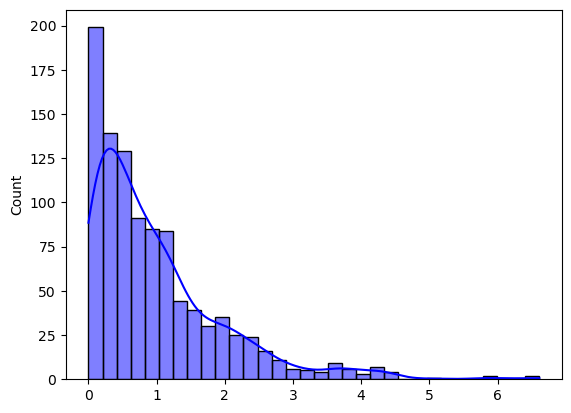

In [29]:
sns.histplot(data_aleatoria,kde=True,color="blue");

In [30]:
loc, scale = expon.fit(data_aleatoria)

statics ,p_value = kstest(data_aleatoria,"expon",args=(loc,scale))

# recordar ese famoso 0.05

print(f"el p_valor es {p_value}")

el p_valor es 0.8807895552889962


# Distribucion de poisson.

In [31]:
# modela el número de eventos que ocurren en un intervalo fijo de tiempo o espacio, bajo la suposición 
# de que los eventos ocurren de manera independiente y a una tasa constante.

# con un ejemplo de llamadas de llamadas por hora.... 

# Parámetro de tasa lambda
lambda_param = 5  # número promedio de llamadas por hora

# Generar números aleatorios distribuidos según Poisson
datos_poisson = np.random.poisson(lam=lambda_param, size=1000)

# Mostrar los primeros 10 datos generados
print(datos_poisson[:10])

[6 2 4 3 1 8 5 6 4 2]


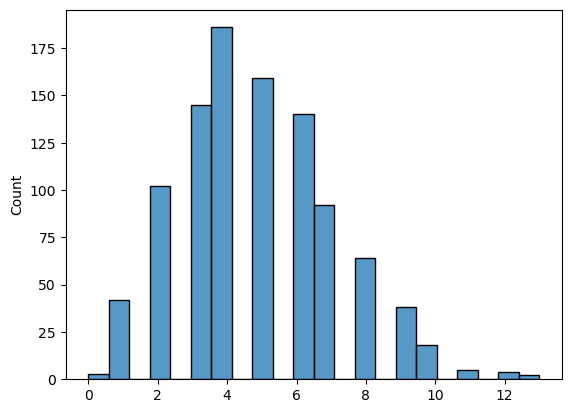

In [33]:
# graficando mis datos
sns.histplot(datos_poisson);

In [34]:
# Calcular la probabilidad de recibir exactamente 3 llamadas en una hora

k = 3 # probabilidad de 3 llamadas por hora
probabilidad = poisson.pmf(k, lambda_param)

probabilidad

0.1403738958142805

## Diferencia Principal entre exponencial y poisson.

*   Distribución Exponencial: Se utiliza para modelar el tiempo entre eventos.

*   Distribución de Poisson: Se utiliza para modelar el número de eventos en un intervalo fijo.

## INTERVALO DE CONFIANZA: 

El intervalo de confianza es una herramienta útil en el análisis de datos. Nos ayuda a estimar un rango de valores dentro del cual probablemente se encuentra una cantidad desconocida (como la media, la proporción o la varianza) 
basada en una muestra de datos.

*   FORMULA O CALCULO:

	- Intervalo de Confianza = Estimación Puntual ± Valor Crítico * Error Estándar

	*   DONDE:
	
		    A- ESTIMACION PUNTUAL: Valor que calculamos a partir de la muestra que tenemos. EJ MEDIA DE LA EDAD ->media_edad = df["age"].mean().

		    B- ERROR ESTANDARD: Es una medida de cuánto varía la estimación puntual debido a la variabilidad en la muestra-> error_edad = stats.sem(df["age"]).

		    C- VALOR CRITICO: calulado del nivel de confianza y de los grados de libertad
												
            C1- nivel_conf = 0.90
			C2- grad_lib = len(df["age"])-1
												
			C3- valor_critico = stats.t.ppf((1 + nivel_conf) / 2, df=grad_lib)

## Calcular el intervalo de confianza

*	limite_inferior_edad = media_edad - valor_critico_edad * error_edad

*	limite_superior_edad = media_edad + valor_critico_edad * error_edad


## PRUEBA DE HIPOTESIS: CON BARLETT Y LEVENE

*   BARLETT: La usaremos cuando tengamos 2 grupos a evaluar.
*   LEVENE:La usaremos cuando tengamos tres o más grupos y deseamos verificar si todas las varianzas son iguales

Es una metodología estadística utilizada para tomar decisiones sobre la población con base en una muestra de datos.

### vamos a definir una función para poder hacer el t-test de Student con una funcion que llamaremos "prueba_hipotesis".
    
1) lo primero que tenemos que hacer es mirar si las varianzas son iguales o no (podemos usar levene o barlett segun corresponda la cantidad de grupos a evluar)

```python
    if len(args) == 2:
        p_valor_varianza = stats.levene(*args, center = "median")[1]
    else:
        p_valor_varianza = stats.bartlett(*args)[1]
```

2) Tenemos en cuenta el valor de p_value, como ya sabemos un valor > 0.05 significa NO rechazar la hipotesis nula, un valor < 0.05 es rechazar la hipotesis nula en favor de la hipotesis alternativa

```python
    if p_valor_varianza > 0.05:
        # realizamos la prueba t de Student
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=True) #indica si se debe asumir que las varianzas de ambas muestras son iguales o no
    else:
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=False) #indica si se debe asumir que las varianzas de ambas muestras son iguales o no
```

3) Establecemos un nivel de significancia (alfa)

    alfa = 0.05

4) comparamos el p-valor con el nivel de significancia

```python
    if p_valor < alfa:
        print("Rechazamos la hipótesis nula.")
        print("Hay una diferencia significativa en los ingresos promedio entre los dos grupos.")
    else:
        print("No podemos rechazar la hipótesis nula.")
        print("No hay evidencia suficiente para afirmar una diferencia significativa en los ingresos promedio entre los dos grupos.")
```


5) USAR FUNCION prueba_hipotesis(DF_GRUPO1 , DF_GRUPO2) --> POR EJEMPLO DF_GRUPO1=df[df["education"]=="secundaria"]["ingresos"]
								                                     DF_GRUPO2=df[df["education"]=="primaria"]["ingresos"]